In [ ]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sales'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')
]


conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Harman_28',
    database='ecommerce'
)
cursor = conn.cursor()


folder_path = 'C:/Users/acer/OneDrive/Desktop/Projects/e-commerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db= mysql.connector.connect(host = 'localhost',
                           username = 'root',
                            password = 'Harman_28',
                            database = 'ecommerce')

cur = db.cursor()


# list all unique cities where customers are located.  

In [90]:
query = "select distinct(customer_city) from customers"

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# . Count the number of orders placed in 2017.

In [92]:
query = "select count(order_id) from orders where year(order_purchase_timestamp)=2017"
cur.execute(query)

data = cur.fetchall()

data [0][0]

45101

# Find the total sales per category

In [94]:
query = """select UPPER(products.product_category),round(sum((price + freight_value)*order_item_id),2) as total_sales from order_items 
join products on order_items.product_id = products.product_id 
group by product_category"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category","Sales"])
df
                  

,Category,Sales
0,HEALTH BEAUTY,1550390.76
1,SPORT LEISURE,1273378.77
2,COOL STUFF,749070.87
3,COMPUTER ACCESSORIES,1318344.53
4,WATCHES PRESENT,1368921.82
...,...,...
69,FLOWERS,1807.98
70,KITCHEN PORTABLE AND FOOD COACH,4306.97
71,HOUSE COMFORT 2,1398.80
72,CITTE AND UPHACK FURNITURE,5998.54


#  Calculate the percentage of orders that were paid in installments.

In [96]:
query = """select sum(case when payment_installments >= 1 then 1 else 0 end)*100/count(*) from payments"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["percentage"])
df
     

,percentage
0,99.9981


#  Count the number of customers from each state

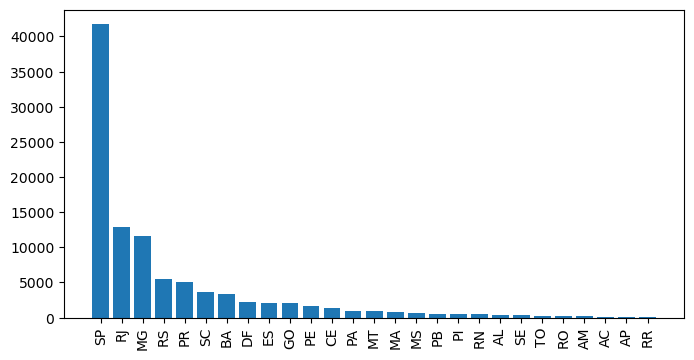

In [5]:
query = """select customer_state, count(*) from customers 
group by customer_state"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["state","no. of customers"])
df = df.sort_values(by = "no. of customers", ascending= False)
plt.figure(figsize = (8,4))
plt.bar(df["state"], df["no. of customers"])
plt.xticks(rotation = 90 )
plt.show()


# Calculate the number of orders per month in 2018

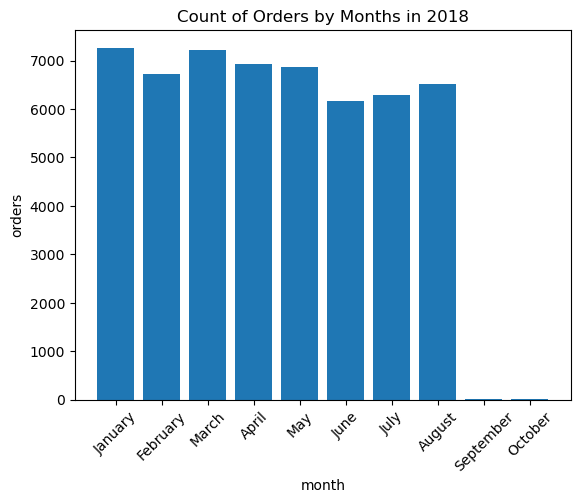

In [7]:
query = """select monthname(order_purchase_timestamp) as month, count(order_id) from orders
where year(order_purchase_timestamp) = 2018
group by month, month(order_purchase_timestamp)
order by month(order_purchase_timestamp)"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["month","orders"])
plt.bar(df["month"],df["orders"])
plt.xlabel("month")
plt.ylabel("orders")
plt.title("Count of Orders by Months in 2018")
plt.xticks(rotation = 45)
plt.show()

# Find the average number of products per order, grouped by customer city

In [ ]:
query = """with order_count as (select orders.order_id, orders.customer_id, count(order_items.order_item_id) as oc 
from order_items
join orders on order_items.order_id = orders.order_id
group by order_id, customer_id)
select customers.customer_city, round(avg(order_count.oc),2)
 from order_count
join customers on customers.customer_id = order_count.customer_id
group by customer_city"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["customer city","avg no. of products"])
df

# Calculate the percentage of total revenue contributed by each product category

In [ ]:
query = """select UPPER(products.product_category), 
round(sum((price*freight_value)*order_item_id)*100/(select sum((price*freight_value)*order_item_id) from order_items),2) revenue 
from order_items
join products on order_items.product_id = products.product_id
group by product_category"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category","percentage distribution"])
df


# Identify the correlation between product price and the number of times a product has been purchased

In [17]:
query = """select 
  upper(products.product_category), 
  count(order_items.product_id) items_purchased, 
  round(avg(price),2) avg_price
from order_items
join products on order_items.product_id = products.product_id
group by product_category"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category","order count","Avg price"])
arr1 = df["order count"]
arr2 = df["Avg price"]
a = np.corrcoef([arr1,arr2])
print("The correlation between price and number of times a product has been purchased is", a[0][1])



The correlation between price and number of times a product has been purchased is -0.10631514167157562


# Calculate the total revenue generated by each seller, and rank them by revenue

In [15]:
import numpy as np

In [19]:
query = """with cte as(select 
seller_id,
round(sum((price + freight_value)*order_item_id),2) revenue
from order_items group by seller_id)
select *, dense_rank() over(order by revenue desc) rnk from cte"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["seller id","revenue","rank"])
df

,seller id,revenue,rank
0,7c67e1448b00f6e969d365cea6b010ab,375389.31,1
1,4a3ca9315b744ce9f8e9374361493884,266660.94,2
2,53243585a1d6dc2643021fd1853d8905,260379.81,3
3,4869f7a5dfa277a7dca6462dcf3b52b2,256418.18,4
4,1025f0e2d44d7041d6cf58b6550e0bfa,240516.24,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.21,3070
3091,702835e4b785b67a084280efca355756,18.56,3071
3092,4965a7002cca77301c82d3f91b82e1a9,16.36,3072
3093,77128dec4bec4878c37ab7d6169d6f26,15.22,3073


# Calculate the moving average of order values for each customer over their order history

In [21]:
query = """select customer_id, order_purchase_timestamp, payment,
round(avg(payment) over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row),2) as mov_avg 
from
(select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment from payments
join orders on payments.order_id = orders.order_id) as a"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["customer id","timestamp","payment","moving avg"])
df

,customer id,timestamp,payment,moving avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.01
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.12
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.13
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.13
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.50


# Calculate the cumulative sales per month for each year

In [27]:
query = """select year, month, payments, round(sum(payments) over (partition by year order by months),2) as cumulative_sum from 
(select year(order_purchase_timestamp) as year,
monthname(order_purchase_timestamp) as month, 
month(order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payments 
from orders join payments on orders.order_id = payments.order_id
group by year, months, month
order by year, months, month) as a"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["year","month","sales","cumulative sales"])
df
        

,year,month,sales,cumulative sales
0,2016,September,252.24,252.24
1,2016,October,59090.48,59342.72
2,2016,December,19.62,59362.34
3,2017,January,138488.04,138488.04
4,2017,February,291908.01,430396.05
5,2017,March,449863.60,880259.65
6,2017,April,417788.03,1298047.68
7,2017,May,592918.82,1890966.50
8,2017,June,511276.38,2402242.88
9,2017,July,592382.92,2994625.80


# Calculate the year-over-year growth rate of total sales

In [35]:
query = """select year, round(ifnull((sales - previous_year)*100/previous_year,0),2) as growth_rate from 
(select year(order_purchase_timestamp) as year,
round(sum(payments.payment_value),2) as sales, 
lag(sum(payments.payment_value)) over(order by year(order_purchase_timestamp)) as previous_year
from orders join payments on orders.order_id = payments.order_id
group by year
order by year) as a"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["year","yoy growth rate"])
df

   

,year,yoy growth rate
0,2016,0.0
1,2017,12112.7
2,2018,20.0


# Identify the top 3 customers who spent the most money in each year

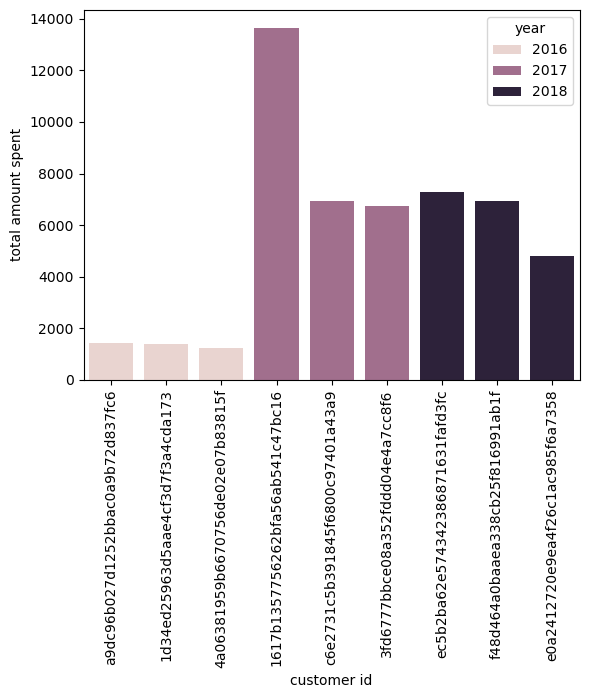

In [47]:
query = """with cte as 
(select year(order_purchase_timestamp) as year,customer_id, sum(payment_value) as total_spend,
rank() over(partition by year(order_purchase_timestamp) order by sum(payment_value) desc ) as rnk
from orders
join payments on orders.order_id = payments.order_id
group by year, customer_id
order by year)
select * from cte where rnk<=3"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["year","customer id","total amount spent","rank"])
sns.barplot(x = "customer id" , y = "total amount spent", data = df, hue ="year")
plt.xticks(rotation = 90)
plt.show()